# **animales**

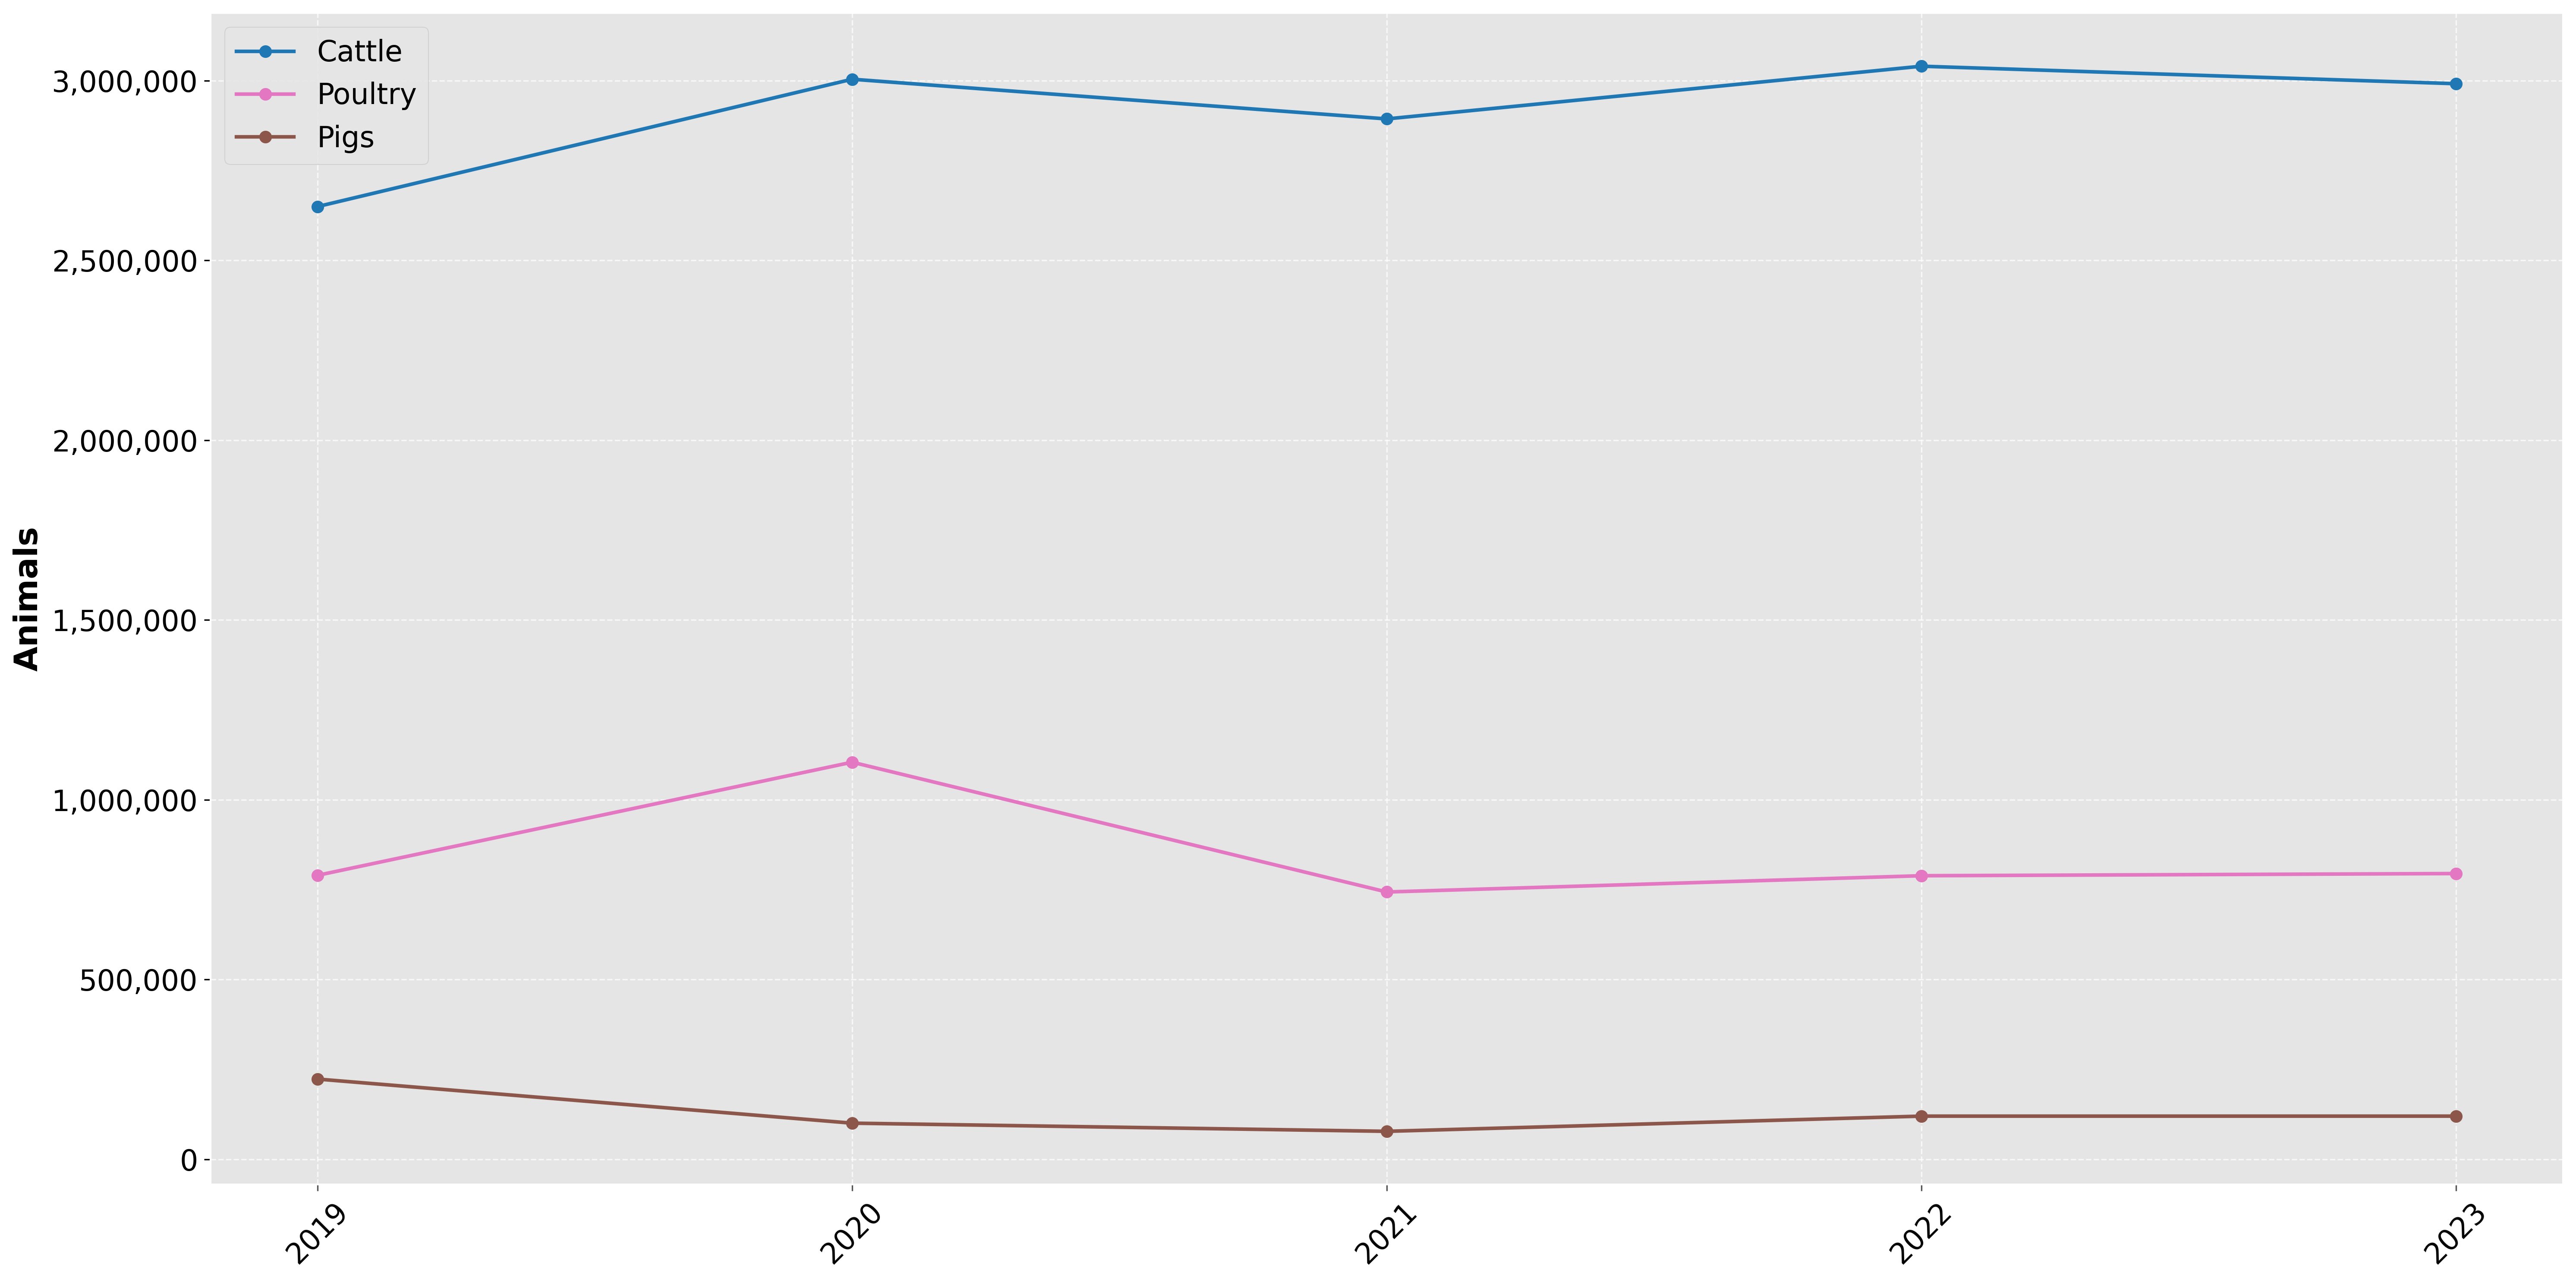

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# Aplicar estilo ggplot
plt.style.use('ggplot')

# Cargar el archivo Excel
data = pd.read_excel('/content/drive/MyDrive/BID/datos_inicio/animal_colombia.xlsx')
departamentos_interes = [
    'Amazonas', 'Caquetá','Guanía', 'Guaviare', 'Putumayo','Vaupés']

# Filtrar la información por los departamentos de interés
data = data[data['Estado'].isin(departamentos_interes)]


etiquetas_a_filtrar = ['Bovino', 'Aves', 'Porcino']
df_filtrado = data[data['Cultivo'].isin(etiquetas_a_filtrar)]

ColombiaAmazonas = df_filtrado.copy()

# Mapeo de traducciones de cultivos del español al inglés
traducciones = {
    'Bovino': 'Cattle',
    'Equinos': 'Equine',
    'Caprinos': 'Goat',
    'Ovinos': 'Sheep',
    'Búfalos': 'Buffalo',
    'Porcino': 'Pigs',
    'Aves': 'Poultry',
    'Codornas': 'Quail'}

# Reemplazar las etiquetas en la columna 'Cultivo'
ColombiaAmazonas['Cultivo'] = ColombiaAmazonas['Cultivo'].replace(traducciones)

# Filtrar la información del año 2022
ColombiaAmazonas_2022 = ColombiaAmazonas[ColombiaAmazonas['Año'] == 2023]

# Determinar los 10 principales cultivos para el año 2022
top10_cultivos_2022 = ColombiaAmazonas_2022.groupby('Cultivo')['Área'].sum().nlargest(10)

# Filtrar el dataframe para incluir solo los 10 principales cultivos
ColombiaAmazonas_top10 = ColombiaAmazonas[ColombiaAmazonas['Cultivo'].isin(top10_cultivos_2022.index)]

ColombiaAmazonas_top10.to_excel('/content/drive/MyDrive/BID/resultados_datos/animal_colombia.xlsx', index=False)

# Función para formatear los números en miles
def thousands_formatter(x, pos):
    return f'{int(x):,}'

# Determinar el rango de años en los datos
min_year = ColombiaAmazonas_top10['Año'].min()
max_year = ColombiaAmazonas_top10['Año'].max()

# Paleta de colores personalizada
colors = {
    'Cattle': '#1f77b4',  # azul
    'Equine': '#2ca02c',  # verde
    'Goat': '#d62728',  # rojo
    'Sheep': '#9467bd',  # morado
    'Buffalo': '#ff7f0e',  # naranja
    'Pigs': '#8c564b',  # marrón
    'Poultry': '#e377c2',  # rosa
    'Cassava': '#17becf',  # cyan
    'Quail': '#f2a700',  # amarillo  # gris
}

# Crear un único gráfico
fig, ax = plt.subplots(figsize=(20, 10), dpi=300)

# Graficar todos los cultivos
for cultivo in top10_cultivos_2022.index:
    cultivo_data = ColombiaAmazonas_top10[ColombiaAmazonas_top10['Cultivo'] == cultivo]
    cultivo_data_agg = cultivo_data.groupby('Año')['Área'].sum()
    ax.plot(cultivo_data_agg.index, cultivo_data_agg.values, marker='o', label=cultivo, color=colors[cultivo], linewidth=2)

# Personalizar el gráfico
ax.set_ylabel('Animals', fontweight='bold', color='black', fontsize=18)  # Etiqueta del eje Y en negro con mayor tamaño
#ax.set_xlabel('Year', fontweight='bold', color='black', fontsize=18)  # Etiqueta del eje X en negro con mayor tamaño
ax.legend(fontsize=16)  # Aumentar el tamaño de las etiquetas de la leyenda
ax.grid(True, linestyle='--', alpha=0.7)
ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Configurar las etiquetas del eje X
ax.set_xticks(range(min_year, max_year + 1, 1))
ax.set_xticklabels(range(min_year, max_year + 1, 1), rotation=45, color='black', fontsize=16)  # Etiquetas del eje X más grandes

# Configurar las etiquetas del eje Y
ax.tick_params(axis='y', colors='black', labelsize=16)  # Etiquetas del eje Y en negro y más grandes

# Ajustar el diseño y guardar el gráfico
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/BID/figuras/animal_colombia.png', dpi=300)
plt.show()

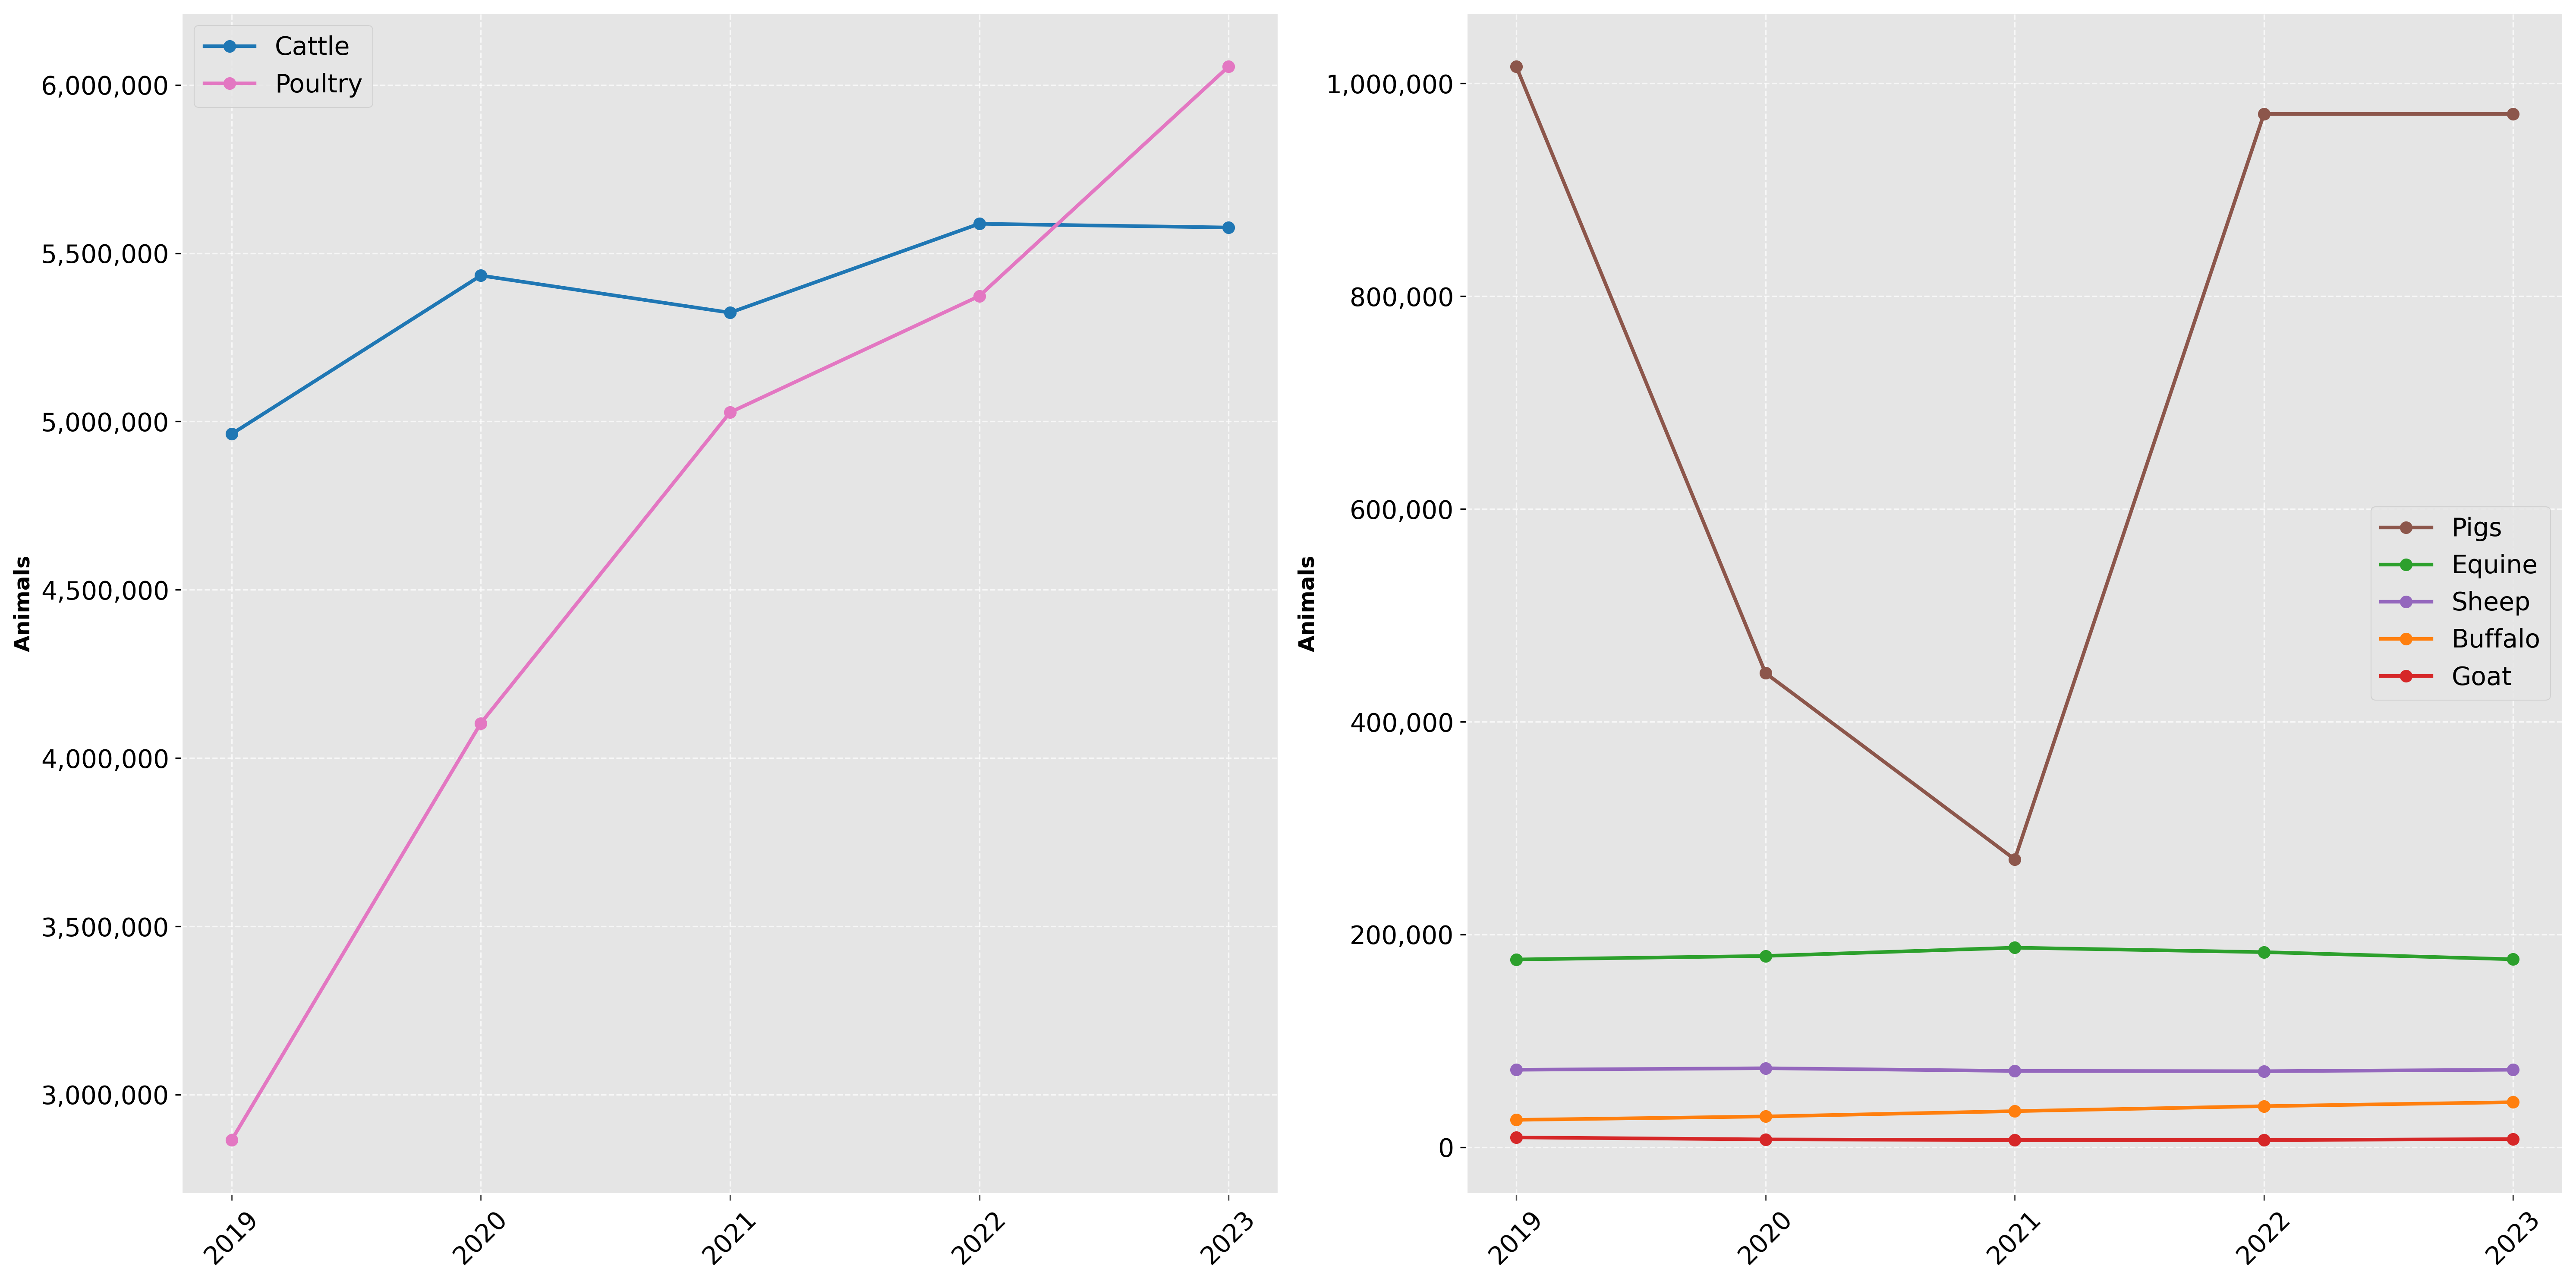

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# Aplicar estilo ggplot
plt.style.use('ggplot')

# Cargar el archivo Excel
data = pd.read_excel('/content/drive/MyDrive/BID/datos_inicio/animal_colombia.xlsx')

ColombiaAmazonas = data.copy()

# Mapeo de traducciones de cultivos del español al inglés
traducciones = {
    'Bovino': 'Cattle',
    'Equinos': 'Equine',
    'Caprinos': 'Goat',
    'Ovinos': 'Sheep',
    'Búfalos': 'Buffalo',
    'Porcino': 'Pigs',
    'Aves': 'Poultry',
    'Codornas': 'Quail'}

# Reemplazar las etiquetas en la columna 'Cultivo'
ColombiaAmazonas['Cultivo'] = ColombiaAmazonas['Cultivo'].replace(traducciones)

# Filtrar la información del año 2022
ColombiaAmazonas_2022 = ColombiaAmazonas[ColombiaAmazonas['Año'] == 2022]

# Determinar los 10 principales cultivos para el año 2022
top10_cultivos_2022 = ColombiaAmazonas_2022.groupby('Cultivo')['Área'].sum().nlargest(10)

# Filtrar el dataframe para incluir solo los 10 principales cultivos
ColombiaAmazonas_top10 = ColombiaAmazonas[ColombiaAmazonas['Cultivo'].isin(top10_cultivos_2022.index)]

ColombiaAmazonas_top10.to_excel('/content/drive/MyDrive/BID/resultados_datos/cultivos_colombia.xlsx', index=False)

# Función para formatear los números en miles
def thousands_formatter(x, pos):
    return f'{int(x):,}'

# Determinar el rango de años en los datos
min_year = ColombiaAmazonas_top10['Año'].min()
max_year = ColombiaAmazonas_top10['Año'].max()

# Paleta de colores personalizada
colors = {
    'Cattle': '#1f77b4',  # azul
    'Equine': '#2ca02c',  # verde
    'Goat': '#d62728',  # rojo
    'Sheep': '#9467bd',  # morado
    'Buffalo': '#ff7f0e',  # naranja
    'Pigs': '#8c564b',  # marrón
    'Poultry': '#e377c2',  # rosa
    'Cassava': '#17becf',  # cyan
    'Quail': '#f2a700',  # amarillo  # gris
}

# Cultivos para los subplots
cultivos_1 = ['Cattle', 'Poultry']
cultivos_2 = [cultivo for cultivo in top10_cultivos_2022.index if cultivo not in cultivos_1]
# Crear los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), dpi=300)

# Primer subplot
for cultivo in cultivos_1:
    cultivo_data = ColombiaAmazonas_top10[ColombiaAmazonas_top10['Cultivo'] == cultivo]
    cultivo_data_agg = cultivo_data.groupby('Año')['Área'].sum()
    ax1.plot(cultivo_data_agg.index, cultivo_data_agg.values, marker='o', label=cultivo, color=colors[cultivo], linewidth=2)

ax1.set_ylabel('Animals', fontweight='bold', color='black')  # Etiqueta del eje Y en negro

#ax1.set_yscale('log')
ax1.legend(fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
ax1.set_xticks(range(2019, max_year + 1, 1))
ax1.set_xticklabels(range(2019, max_year + 1, 1), rotation=45, color='black', fontsize=14)  # Etiquetas del eje X en negro
ax1.tick_params(axis='y', colors='black', labelsize=14)  # Etiquetas del eje Y en negro

# Segundo subplot
for cultivo in cultivos_2:
    cultivo_data = ColombiaAmazonas_top10[ColombiaAmazonas_top10['Cultivo'] == cultivo]
    cultivo_data_agg = cultivo_data.groupby('Año')['Área'].sum()
    ax2.plot(cultivo_data_agg.index, cultivo_data_agg.values, marker='o', label=cultivo, color=colors[cultivo], linewidth=2)

ax2.set_ylabel('Animals', fontweight='bold', color='black')  # Etiqueta del eje Y en negro

#ax2.set_yscale('log')
ax2.legend(fontsize=14)
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
ax2.set_xticks(range(2019, max_year + 1, 1))
ax2.set_xticklabels(range(2019, max_year + 1, 1), rotation=45, color='black', fontsize=14)  # Etiquetas del eje X en negro
ax2.tick_params(axis='y', colors='black', labelsize=14)  # Etiquetas del eje Y en negro

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/BID/figuras/animal_colombia2.png', dpi=300)
plt.show()

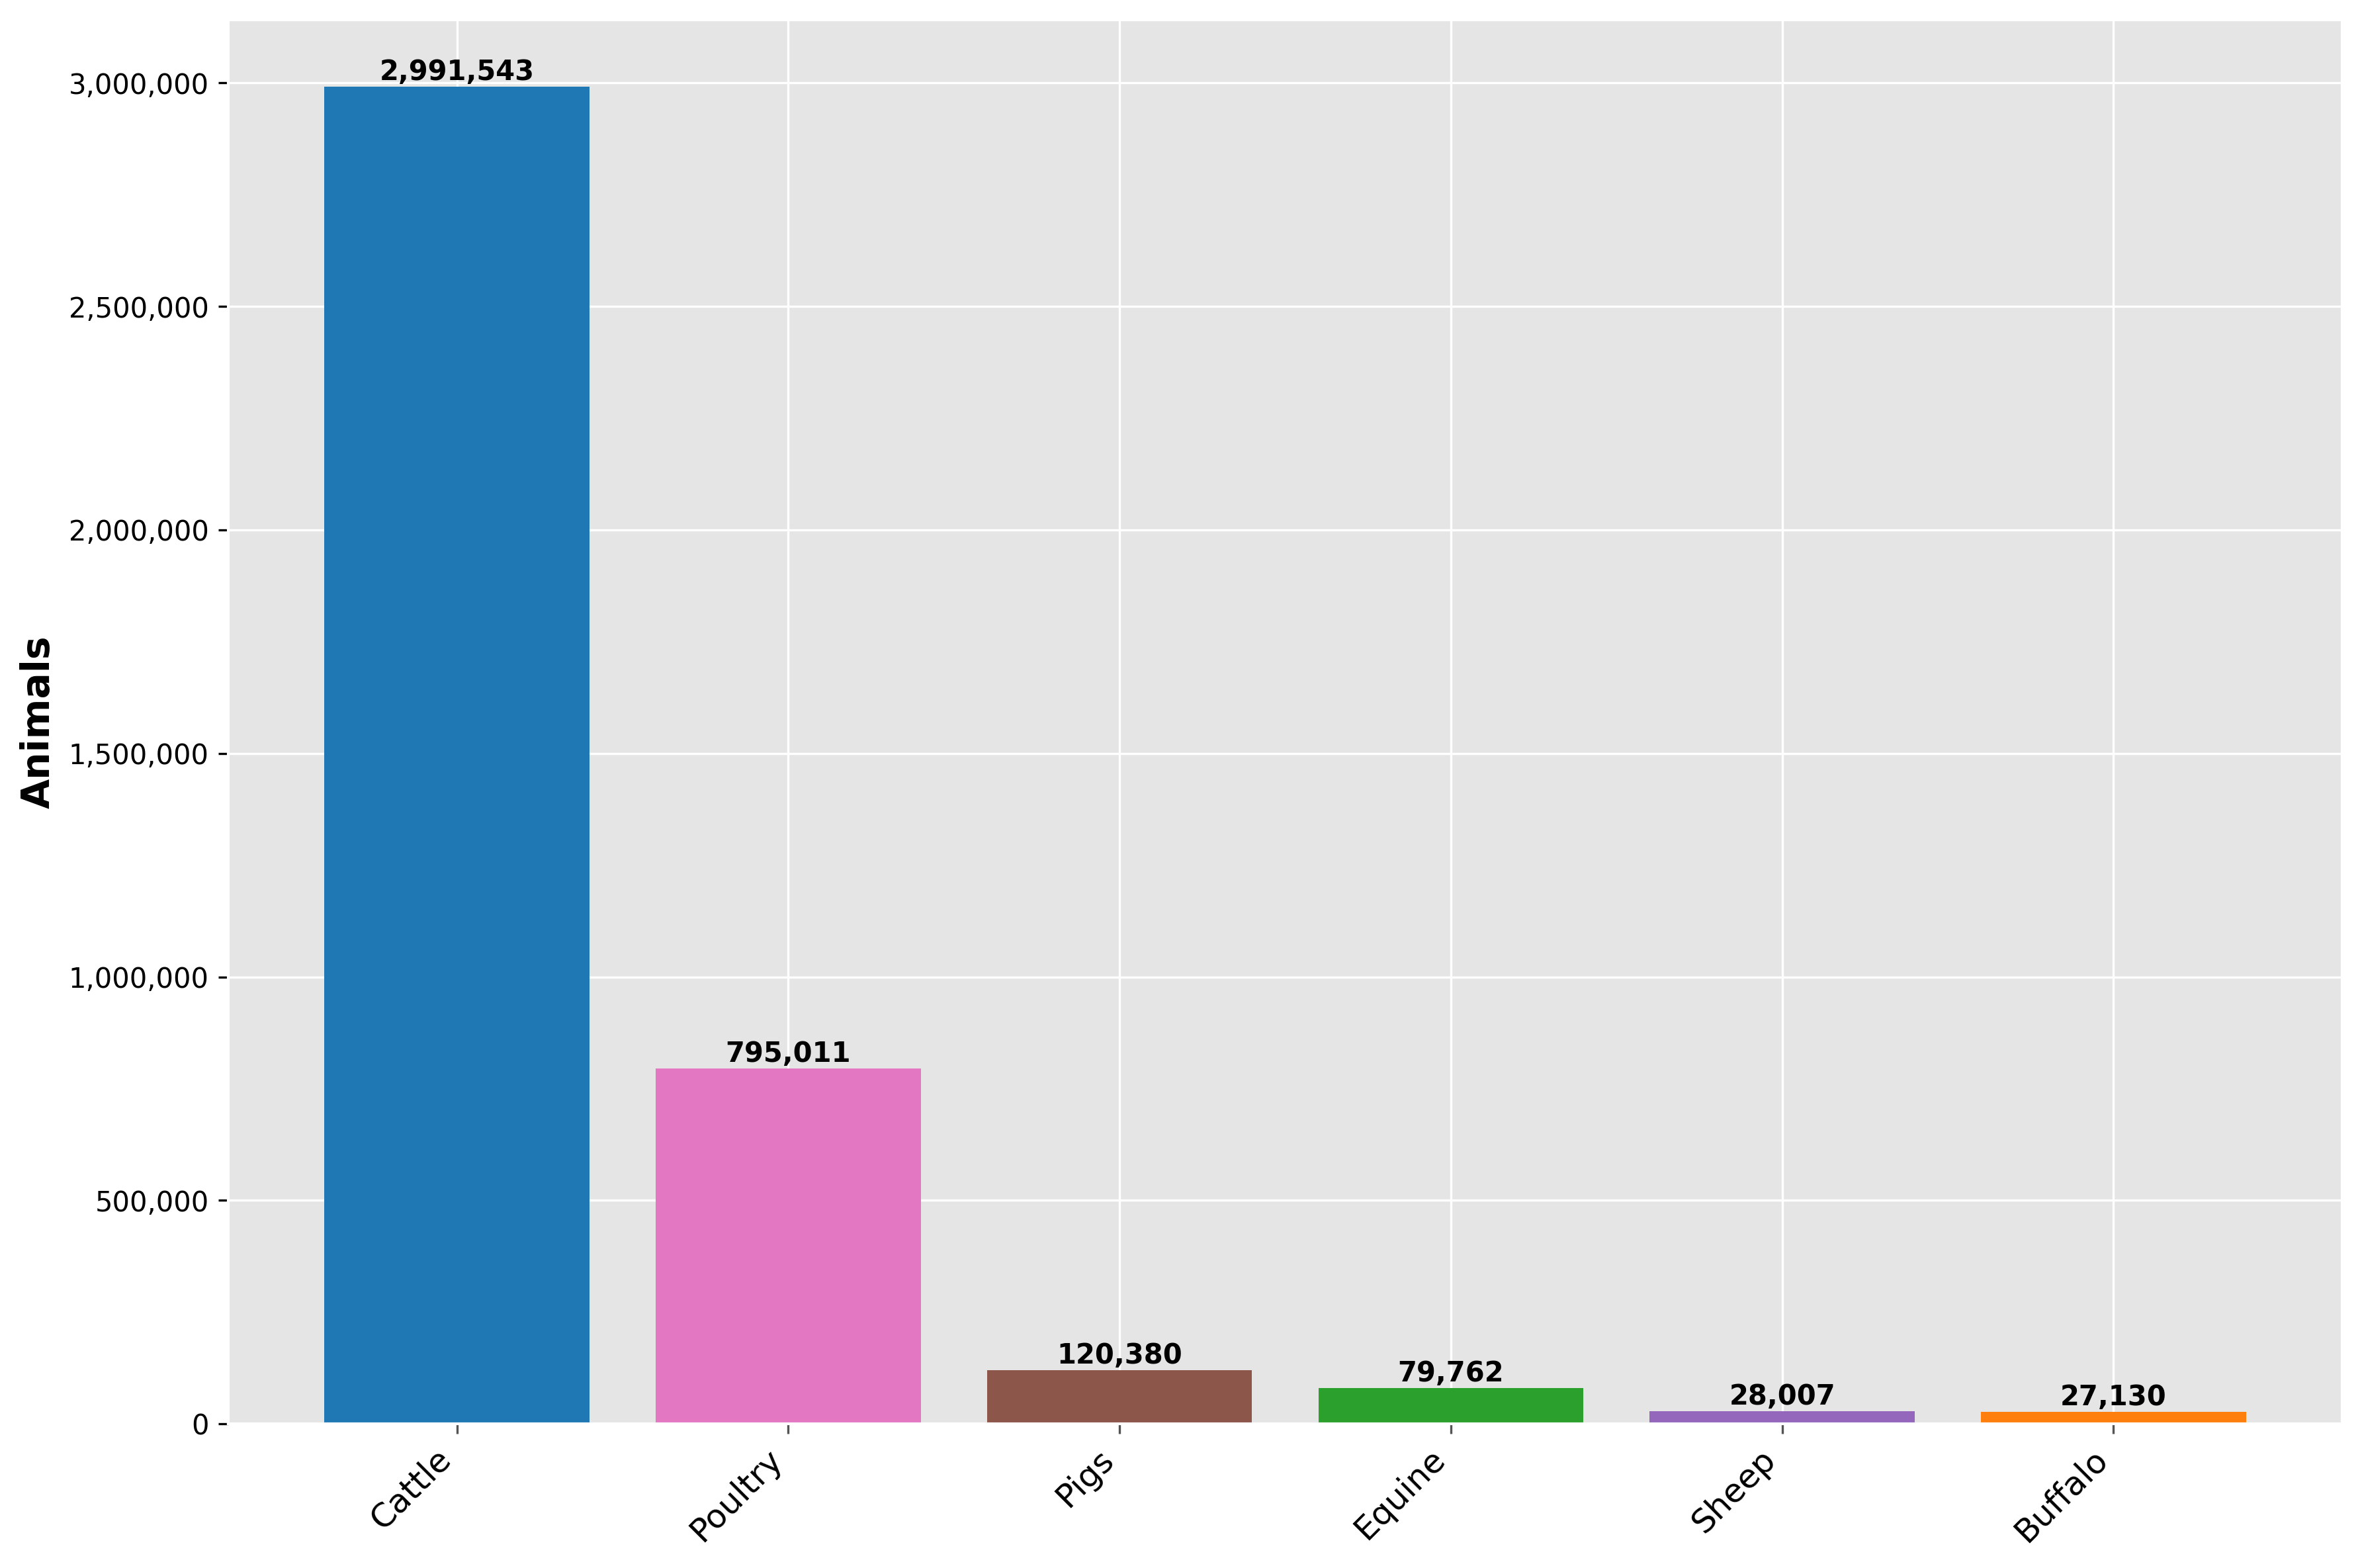

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Aplicar estilo ggplot con fondo oscuro
plt.style.use('ggplot')

# Cargar el archivo Excel
file_path = '/content/drive/MyDrive/BID/datos_inicio/animal_colombia.xlsx'
df = pd.read_excel(file_path)

departamentos_interes = [
    'Amazonas', 'Caquetá','Guanía', 'Guaviare', 'Putumayo','Vaupés']

# Filtrar la información por los departamentos de interés
df = df[df['Estado'].isin(departamentos_interes)]
df = df[df['Cultivo'] != 'Caprinos']
# Filtrar los datos para el año 2023 y seleccionar las columnas relevantes
df_2023 = df[df['Año'] == 2023][['Cultivo', 'Área']]

# Agrupar por cultivo y sumar las áreas sembradas
df_2023_grouped = df_2023.groupby('Cultivo').agg({'Área': 'sum'}).reset_index()

# Seleccionar los 10 cultivos con mayor área sembrada
top_10_cultivos = df_2023_grouped.nlargest(10, 'Área')

# Mapeo de traducciones de cultivos del español al inglés
traducciones = {
    'Bovino': 'Cattle',
    'Equinos': 'Equine',
    'Caprinos': 'Goat',
    'Ovinos': 'Sheep',
    'Búfalos': 'Buffalo',
    'Porcino': 'Pigs',
    'Aves': 'Poultry',
    'Codornas': 'Quail'}

# Reemplazar las etiquetas en la columna 'Cultivo'
top_10_cultivos['Cultivo'] = top_10_cultivos['Cultivo'].replace(traducciones)

# Paleta de colores personalizada (igual al gráfico anterior)
colors = {
    'Cattle': '#1f77b4',  # azul
    'Equine': '#2ca02c',  # verde
    'Goat': '#d62728',  # rojo
    'Sheep': '#9467bd',  # morado
    'Buffalo': '#ff7f0e',  # naranja
    'Pigs': '#8c564b',  # marrón
    'Poultry': '#e377c2',  # rosa
    'Cassava': '#17becf',  # cyan
    'Quail': '#f2a700',  # amarillo  # gris
}

# Asignar colores a las barras según el cultivo
bar_colors = [colors[cultivo] for cultivo in top_10_cultivos['Cultivo']]

# Establecer estilo
#sns.set_style("darkgrid")  # Ajuste para mantener un fondo con cuadrículas claras en un entorno oscuro

# Crear gráfico de barras
plt.figure(figsize=(12, 8), dpi=300)
bars = plt.bar(top_10_cultivos['Cultivo'], top_10_cultivos['Área'], color=bar_colors)

# Añadir etiquetas y título
plt.ylabel('Animals', fontsize=14, fontweight='bold', color='black')  # Etiquetas en color blanco

# Rotar etiquetas del eje x
plt.xticks(rotation=45, ha='right', fontsize=12, color='black')  # Etiquetas del eje x en color blanco

# Formatear eje y con separadores de miles
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.gca().yaxis.label.set_color('black')  # Color de la etiqueta del eje Y
plt.gca().tick_params(axis='y', colors='black')  # Color de los números del eje Y

# Añadir etiquetas de valores encima de las barras con separadores de miles
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1300, f'{yval:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Ajustar el diseño para una mejor presentación
plt.tight_layout()

# Guardar la gráfica como imagen PNG
plt.savefig('/content/drive/MyDrive/BID/figuras/animal_colombiatop.png', dpi=300)

# Mostrar la gráfica
plt.show()